In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
# importing libraries

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional, Flatten,concatenate
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd
data = pd.read_csv('Processed_Happy_dataset.csv',

                encoding='latin-1')

data

,Unnamed: 0.1,Unnamed: 0,Tweet,sentiment,Date,depression_Intensity,text,tidy_text,Subjectivity,Polarity,Positive Negative Word Count,text_clean,text_tokens
0,0,0,@robinbankzz thanks for followiiiiing legend,Non-Depressive,Sat Jun 06 16:23:05 PDT 2009,0.412875,thanks followiiiiing legend,thanks followiiiiing legend,0.200000,0.200000,Positive,thanks followiiiiing legend,"['thanks', 'followiiiiing', 'legend']"
1,1,1,"@emmajg that's my plan. it's only 10 am here,...",Non-Depressive,Sun Jun 07 06:57:27 PDT 2009,0.344886,That plan only here plan whole jammies,that plan only here plan whole jammies,0.700000,0.100000,Positive,plan plan whole jammies,"['plan', 'plan', 'whole', 'jammies']"
2,2,2,@yungryfunk have a safe flight!,Non-Depressive,Wed Jun 03 03:05:17 PDT 2009,0.420934,Have safe flight,have safe flight,0.500000,0.500000,Positive,safe flight,"['safe', 'flight']"
3,3,3,hey! @lons sighting at fred 62. i swear i am n...,Non-Depressive,Sat May 02 12:28:19 PDT 2009,0.300517,sighting Fred swear stalker Just,sighting fred swear stalker just,0.000000,0.000000,Positive,sighting fred swear stalker,"['sighting', 'fred', 'swear', 'stalker']"
4,4,4,@davidarchie aww they're all playing in the uk...,Non-Depressive,Sun May 03 16:29:00 PDT 2009,0.399074,they playing right maybe they come YOUR show,they playing right maybe they come your show,0.535714,0.285714,Positive,playing right maybe come show,"['playing', 'right', 'maybe', 'come', 'show']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63925,63925,63925,slow day. @work. lots op people have the day o...,Non-Depressive,Fri May 22 02:19:22 PDT 2009,0.344886,Slow Lots people have nooo Gotta defend fortre...,slow lots people have nooo gotta defend fortre...,0.400000,-0.300000,Negative,slow lots people nooo gotta defend fortress,"['slow', 'lots', 'people', 'nooo', 'got', 'ta'..."
63926,63926,63926,@durian_girl here's a song to celebrate the ar...,Non-Depressive,Sun May 31 03:24:02 PDT 2009,0.444724,Here song celebrate arrival loveliest sweetest...,here song celebrate arrival loveliest sweetest...,0.000000,0.000000,Positive,song celebrate arrival loveliest sweetest baby...,"['song', 'celebrate', 'arrival', 'loveliest', ..."
63927,63927,63927,from some strange mystical force i got my suit...,Non-Depressive,Sat May 30 20:49:03 PDT 2009,0.313655,From some strange mystical force suitcase shov...,from some strange mystical force suitcase shov...,0.150000,-0.050000,Negative,strange mystical force suitcase shoved zipped,"['strange', 'mystical', 'force', 'suitcase', '..."
63928,63928,63928,skyy vodka-raspberry mixed w/ sprite......my d...,Non-Depressive,Sat May 16 20:29:04 PDT 2009,0.344886,skyy vodka raspberry mixed sprite drink choice...,skyy vodka raspberry mixed sprite drink choice...,0.250000,0.000000,Positive,skyy vodka raspberry mixed sprite drink choice...,"['skyy', 'vodka', 'raspberry', 'mixed', 'sprit..."


In [11]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Tweet', 'sentiment', 'Date',
       'depression_Intensity', 'text', 'tidy_text', 'Subjectivity', 'Polarity',
       'Positive Negative Word Count', 'text_clean', 'text_tokens'],
      dtype='object')

In [12]:

data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

data



,Tweet,sentiment,Date,depression_Intensity,text,tidy_text,Subjectivity,Polarity,Positive Negative Word Count,text_clean,text_tokens
0,@robinbankzz thanks for followiiiiing legend,Non-Depressive,Sat Jun 06 16:23:05 PDT 2009,0.412875,thanks followiiiiing legend,thanks followiiiiing legend,0.200000,0.200000,Positive,thanks followiiiiing legend,"['thanks', 'followiiiiing', 'legend']"
1,"@emmajg that's my plan. it's only 10 am here,...",Non-Depressive,Sun Jun 07 06:57:27 PDT 2009,0.344886,That plan only here plan whole jammies,that plan only here plan whole jammies,0.700000,0.100000,Positive,plan plan whole jammies,"['plan', 'plan', 'whole', 'jammies']"
2,@yungryfunk have a safe flight!,Non-Depressive,Wed Jun 03 03:05:17 PDT 2009,0.420934,Have safe flight,have safe flight,0.500000,0.500000,Positive,safe flight,"['safe', 'flight']"
3,hey! @lons sighting at fred 62. i swear i am n...,Non-Depressive,Sat May 02 12:28:19 PDT 2009,0.300517,sighting Fred swear stalker Just,sighting fred swear stalker just,0.000000,0.000000,Positive,sighting fred swear stalker,"['sighting', 'fred', 'swear', 'stalker']"
4,@davidarchie aww they're all playing in the uk...,Non-Depressive,Sun May 03 16:29:00 PDT 2009,0.399074,they playing right maybe they come YOUR show,they playing right maybe they come your show,0.535714,0.285714,Positive,playing right maybe come show,"['playing', 'right', 'maybe', 'come', 'show']"
...,...,...,...,...,...,...,...,...,...,...,...
63925,slow day. @work. lots op people have the day o...,Non-Depressive,Fri May 22 02:19:22 PDT 2009,0.344886,Slow Lots people have nooo Gotta defend fortre...,slow lots people have nooo gotta defend fortre...,0.400000,-0.300000,Negative,slow lots people nooo gotta defend fortress,"['slow', 'lots', 'people', 'nooo', 'got', 'ta'..."
63926,@durian_girl here's a song to celebrate the ar...,Non-Depressive,Sun May 31 03:24:02 PDT 2009,0.444724,Here song celebrate arrival loveliest sweetest...,here song celebrate arrival loveliest sweetest...,0.000000,0.000000,Positive,song celebrate arrival loveliest sweetest baby...,"['song', 'celebrate', 'arrival', 'loveliest', ..."
63927,from some strange mystical force i got my suit...,Non-Depressive,Sat May 30 20:49:03 PDT 2009,0.313655,From some strange mystical force suitcase shov...,from some strange mystical force suitcase shov...,0.150000,-0.050000,Negative,strange mystical force suitcase shoved zipped,"['strange', 'mystical', 'force', 'suitcase', '..."
63928,skyy vodka-raspberry mixed w/ sprite......my d...,Non-Depressive,Sat May 16 20:29:04 PDT 2009,0.344886,skyy vodka raspberry mixed sprite drink choice...,skyy vodka raspberry mixed sprite drink choice...,0.250000,0.000000,Positive,skyy vodka raspberry mixed sprite drink choice...,"['skyy', 'vodka', 'raspberry', 'mixed', 'sprit..."


In [13]:
#data = data[data['sentiment']!='Depressed']
#data.to_csv("Happy_intensity.csv")

In [14]:
data1 = pd.read_csv('Processed_depression_dataset.csv',

                encoding='latin-1')

In [19]:
data.rename(columns = {'sentiment':'Sentiment'}, inplace = True)
data.columns

Index(['Tweet', 'Sentiment', 'Date', 'depression_Intensity', 'text',
       'tidy_text', 'Subjectivity', 'Polarity', 'Positive Negative Word Count',
       'text_clean', 'text_tokens'],
      dtype='object')

In [21]:
data1.columns

Index(['Tweet', 'Date', 'depression_Intensity', 'Sentiment', 'tidy_text',
       'Subjectivity', 'Polarity', 'Positive Negative Word Count',
       'text_clean', 'text_tokens'],
      dtype='object')

In [20]:
data = data.drop(columns=['text'])

data.columns

Index(['Tweet', 'Sentiment', 'Date', 'depression_Intensity', 'tidy_text',
       'Subjectivity', 'Polarity', 'Positive Negative Word Count',
       'text_clean', 'text_tokens'],
      dtype='object')

In [22]:
df_all = pd.concat([data, data1])
df_all
data = df_all

In [24]:
data.to_csv("Depression_Final_Clean_dataset.csv")

In [14]:
#y1=data['sentiment']
y2=data['depression_Intensity']

In [15]:
#X=data.drop(['Tweet', 'sentiment', 'Date', 'depression_Intensity', 'text',
#       'text_clean', 'text_clean_tokens'], axis = 1)
X=data['text_clean']

In [8]:
y_t=y1.apply(lambda x: 1 if x=='Depressed' else 0)
y_t.sample(15)

13134    1
18956    1
57679    0
36079    0
9995     1
60002    0
7645     1
79949    0
70815    0
62840    0
80733    0
48790    0
34794    0
41907    0
52679    0
Name: sentiment, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_rem, Y_train, Y_rem = train_test_split(X,y2, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_rem.shape,Y_rem.shape)
X_test, X_vald, Y_test, Y_vald = train_test_split( X_rem,Y_rem, test_size = 0.30, random_state = 42)
print(X_vald.shape,Y_vald.shape)


(66725,) (66725,)
(28597,) (28597,)
(8580,) (8580,)


In [21]:
# reshaping x_train for efficient modelling
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

IndexError: tuple index out of range

In [49]:
# LSTM architecture

regressor = Sequential()

# add first layer with dropout

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# add second layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add third layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# add fourth layer

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# the output layer

regressor.add(Dense(units=1))

In [50]:
# compiling the LSTM RNN network

regressor.compile(optimizer='adam',metrics = ['mean_squared_error'],loss='mean_squared_error')

# fit to the training set

regressor.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1851/1851 [==============================] - 253s 131ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 2/10
1851/1851 [==============================] - 242s 131ms/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 3/10
1851/1851 [==============================] - 256s 138ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 4/10
1851/1851 [==============================] - 242s 131ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 5/10
 414/1851 [=====>........................] - ETA: 3:10 - loss: 0.0061 - mean_squared_error: 0.0061

KeyboardInterrupt: 

In [22]:
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [23]:

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
# predicting the stock prices for test set

predicted = regressor.predict(X_test)
#predicted = sc.inverse_transform(predicted)
predicted

556/556 [==============================] - 25s 44ms/step


array([[0.41137883],
       [0.412849  ],
       [0.4110733 ],
       ...,
       [0.41648433],
       [0.4157775 ],
       [0.42024946]], dtype=float32)

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicted, Y_test)

0.0641292993105081

In [29]:
import math
trainScore = regressor.evaluate(X_train, Y_train, verbose=0)



In [31]:
trainScore

[0.006309434771537781, 0.006309434771537781]

In [32]:
print('Train Score: %.9f MSE (%.9f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

Train Score: 0.006309435 MSE (0.079431951 RMSE)


In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicted1, Y_test)

0.0641292993105081

In [51]:
embed_dim = 128
lstm_out = 196

model2 = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['MeanSquaredError'])
print(model.summary())

NameError: name 'max_fatures' is not defined

In [52]:
#Hijibiji Try

In [69]:
seq_length=150
nlp_input = Input(shape=(seq_length,), name='nlp_input')
meta_input = Input(shape=(10,), name='meta_input')
emb = Embedding(output_dim=embed_dim, input_dim=100, input_length=seq_length)(nlp_input)
nlp_out = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3))(emb)
x = concatenate([nlp_out, meta_input])


x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=[nlp_input , meta_input], outputs=[x])

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nlp_input (InputLayer)         [(None, 150)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 150, 128)     12800       ['nlp_input[0][0]']              
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 256)         263168      ['embedding_4[0][0]']            
 )                                                                                                
                                                                                                  
 meta_input (InputLayer)        [(None, 10)]         0           []                           

In [73]:
data.columns

Index(['Tweet', 'sentiment', 'Date', 'depression_Intensity', 'text',
       'text_clean', 'text_clean_tokens', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6',
       'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16',
       'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25'],
      dtype='object')

In [77]:
model.compile(optimizer='adam',metrics = ['mean_squared_error'],loss='mean_squared_error')

# fit to the training set

model.fit(data['text_clean'], data['depression_Intensity'], epochs=25, batch_size=32)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [45]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(SpatialDropout1D(0.4))

#regressor.add(Dropout(0.2))

# add second layer

#regressor.add(LSTM(units=50, return_sequences=True))

model.add(LSTM(dropout=0.2,units=50, recurrent_dropout=0.2))
model.add(Dense(2,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['MeanSquaredError'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 62, 50)            10400     
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 62, 50)           0         
 lDropout1D)                                                     
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,702
Trainable params: 30,702
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
model.compile(optimizer='adam',metrics = ['mean_squared_error'],loss='mean_squared_error')

# fit to the training set

model.fit(X_train, Y_train, epochs=25, batch_size=32)

Epoch 1/25
1851/1851 [==============================] - 208s 109ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 2/25
1851/1851 [==============================] - 190s 103ms/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 3/25
1851/1851 [==============================] - 194s 105ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 4/25
1851/1851 [==============================] - 196s 106ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 5/25
1851/1851 [==============================] - 219s 118ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 6/25
1851/1851 [==============================] - 221s 119ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 7/25
 312/1851 [====>.........................] - ETA: 2:47 - loss: 0.0062 - mean_squared_error: 0.0062

KeyboardInterrupt: 

In [38]:
# predicting the stock prices for test set

predicted1 = model.predict(X_test)
#predicted = sc.inverse_transform(predicted)

556/556 [==============================] - 27s 49ms/step


In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicted, Y_test)

0.0641292993105081

In [44]:
predicted_vald = model.predict(X_vald)
mean_absolute_error(predicted_vald, Y_vald)

238/238 [==============================] - 11s 47ms/step


0.0641775812304546

In [41]:
import math
testScore = model.evaluate(X_test, Y_test, verbose=0)



In [42]:
print('Train Score: %.9f MSE (%.9f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.006372601 MSE (0.079828574 RMSE)


In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

In [18]:
p=str(data['text_clean'])

In [20]:
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Tweet'].values)
X = tokenizer.texts_to_sequences(data['Tweet'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   20,    8,   50,   52,    3,   92,  124,
          36],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   52,   32,   28,  966,  391,  148,   13,  200, 1796,
        1194]])

In [26]:
X.shape

(84603, 62)

In [39]:

X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_rem.shape,Y_rem.shape)
import tensorflow as tf
import numpy as np

#X_train[0]
from keras import backend as K
X_train1 = K.cast_to_floatx(X_train)
Y_train1 = K.cast_to_floatx(Y_train)

(59222, 62) (59222, 2)
(25381, 62) (25381, 2)


In [59]:
from keras.models import Model
from keras.layers import Input
from keras import layers, models
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding,Dropout
from keras.preprocessing import sequence
from keras.utils import to_categorical
import scipy.io as sio
from keras import backend as K
import h5py
import numpy as np
import os
import keras
from numpy import array
np.random.seed(1337)

In [40]:
def build_model_LSTM():
    inputs = Input(shape=(62,1,))
    x = LSTM(32,return_sequences=True)(inputs)
    x = LSTM(16,return_sequences=True)(x)
    x = LSTM(4,return_sequences=False)(x)
    output_dep = Dense(1, activation='sigmoid')(x)
    model = Model(input=[inputs], output=[output_dep])
    model.summary()
    return model

In [41]:
model1 = build_model_LSTM()

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
checkpoint = keras.callbacks.ModelCheckpoint('./models/best_weights.h5', monitor='val_dense_4_loss', save_best_only=True,                                            verbose=1,mode='min')
early_stopping=keras.callbacks.EarlyStopping(monitor='val_dense_4_loss', patience=20, verbose=1, mode='min')
model.compile(
    optimizer=sgd,
    loss='binary_crossentropy', #similar to tf sigmoid_cross_entropy_with_logits
    metrics=['acc']
)

TypeError: ('Keyword argument not understood:', 'input')

In [28]:
embed_dim = 128
lstm_out = 196

model = Sequential()
#model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(model.add(LSTM(64, activation='relu', input_shape=(62,128, X_train.shape[1]), return_sequences=True)))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

ValueError: Input 0 of layer "lstm_3" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 62, 128, 62)

In [18]:
data

,Tweet,sentiment,Date,depression_Intensity,text,text_clean,text_clean_tokens,0,1,2,...,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25
0,this is about how festive i feel right now,Depressed,2022-12-23 17:39:14+00:00,0.558321,This about festive feel right,festive feel right,"['f', 'e', 's', 't', 'i', 'v', 'e', ' ', 'f', ...",5,15,2267,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.260000,0.010000,0.010000,0.510000
1,how can we deliver order without getting on ...,Depressed,2022-12-23 17:05:55+00:00,0.506055,deliver order without getting,deliver order without getting,"['d', 'e', 'l', 'i', 'v', 'e', 'r', ' ', 'o', ...",2268,722,266,...,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.259919
2,not all are the same and it is important to u...,Depressed,2022-12-23 16:34:07+00:00,0.506055,same important understand before agree medicat...,important understand agree medications someone...,"['i', 'm', 'p', 'o', 'r', 't', 'a', 'n', 't', ...",141,296,327,...,0.003636,0.003636,0.003636,0.003636,0.003636,0.003636,0.003636,0.003636,0.003636,0.912727
3,Ã£ÂÃ¢ÂÃ£ÂÃ¢Â¿sientes que estÃ£ÂÃ¢ÂÃ£ÂÃ¢Â...,Depressed,2022-12-23 16:08:03+00:00,0.506055,Sientes cayendo oscuridad Manga Oyasumi Punpun...,sientes cayendo oscuridad manga oyasumi punpun...,"['s', 'i', 'e', 'n', 't', 'e', 's', ' ', 'c', ...",11261,20462,20463,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
4,"i am depressed, heartbroken the one who is don...",Depressed,2022-12-23 14:57:10+00:00,0.588954,depressed heartbroken done with this world peo...,depressed heartbroken done world people thinks...,"['d', 'e', 'p', 'r', 'e', 's', 's', 'e', 'd', ...",478,8239,119,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.101737,0.003333,0.003333,0.003333,0.224738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84598,slow day. @work. lots op people have the day o...,Non-Depressive,Fri May 22 02:19:22 PDT 2009,0.344886,Slow Lots people have nooo Gotta defend fortre...,slow lots people nooo gotta defend fortress,"['s', 'l', 'o', 'w', ' ', 'l', 'o', 't', 's', ...",1001,348,25,...,0.003636,0.003636,0.094545,0.003636,0.003636,0.276364,0.003636,0.094545,0.094545,0.003636
84599,@durian_girl here's a song to celebrate the ar...,Non-Depressive,Sun May 31 03:24:02 PDT 2009,0.444724,Here song celebrate arrival loveliest sweetest...,song celebrate arrival loveliest sweetest baby...,"['s', 'o', 'n', 'g', ' ', 'c', 'e', 'l', 'e', ...",26,144,1077,...,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.130000,0.005000,0.005000
84600,from some strange mystical force i got my suit...,Non-Depressive,Sat May 30 20:49:03 PDT 2009,0.313655,From some strange mystical force suitcase shov...,strange mystical force suitcase shoved zipped,"['s', 't', 'r', 'a', 'n', 'g', 'e', ' ', 'm', ...",10,21,1302,...,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
84601,skyy vodka-raspberry mixed w/ sprite......my d...,Non-Depressive,Sat May 16 20:29:04 PDT 2009,0.344886,skyy vodka raspberry mixed sprite drink choice...,skyy vodka raspberry mixed sprite drink choice...,"['s', 'k', 'y', 'y', ' ', 'v', 'o', 'd', 'k', ...",51825,3007,5536,...,0.006667,0.006667,0.006667,0.173333,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667


In [19]:
y_t=y1.apply(lambda x: 1 if x=='Depressed' else 0)
y_t.sample(15)

27998    0
53580    0
7283     1
1279     1
66643    0
66138    0
3478     1
39719    0
34685    0
70858    0
19268    1
53208    0
15439    1
76917    0
1273     1
Name: sentiment, dtype: int64

In [20]:
Y = pd.get_dummies(y_t).values

In [23]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/embedding/embedding_lookup' defined at (most recent call last):
    File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\HP\AppData\Local\Temp\ipykernel_4116\2476775037.py", line 2, in <cell line: 2>
      model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 1)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential/embedding/embedding_lookup'
indices[121,0] = 3568 is not in [0, 2000)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_train_function_4008]

In [28]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['MeanSquaredError'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 56, 128)           256000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 56, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 196)               254800    
                                                                 
 dense_2 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
Y = data['depression_Intensity'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(67682, 56) (67682,)
(16921, 56) (16921,)


In [31]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
529/529 [==============================] - 297s 555ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 2/15
529/529 [==============================] - 325s 614ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 3/15
529/529 [==============================] - 315s 595ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 4/15
529/529 [==============================] - 323s 611ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 5/15
529/529 [==============================] - 345s 652ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 6/15
529/529 [==============================] - 330s 624ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 7/15
529/529 [==============================] - 341s 644ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 8/15
529/529 [==============================] - 346s 655ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 9/15
529/529 [==============================] - 329s 622ms/step - loss: 0.0029 - m

In [32]:
Y

array([0.55832128, 0.50605484, 0.50605484, ..., 0.31365496, 0.34488614,
       0.42371285])

In [44]:
import math
trainScore = model.evaluate(X_train, Y_train, verbose=0)



TypeError: not all arguments converted during string formatting

In [46]:
print('Train Score: %.9f MSE (%.9f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

Train Score: 0.002187935 MSE (0.046775367 RMSE)


In [38]:
trainScore

[0.002187934936955571, 0.002187934936955571]

In [40]:
tests = model.evaluate(X_test, Y_test, verbose=0)



In [42]:
tests[0]

0.0029542502015829086

In [48]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

529/529 [==============================] - 25s 47ms/step


In [65]:
testPredict

array([[0.37795675, 0.3773162 ],
       [0.4034699 , 0.401003  ],
       [0.389361  , 0.3897096 ],
       ...,
       [0.34816152, 0.34813195],
       [0.41651562, 0.41502422],
       [0.35404903, 0.35469863]], dtype=float32)

In [64]:
Y_test

array([0.50605484, 0.40995755, 0.34488614, ..., 0.34488614, 0.40995755,
       0.34488614])

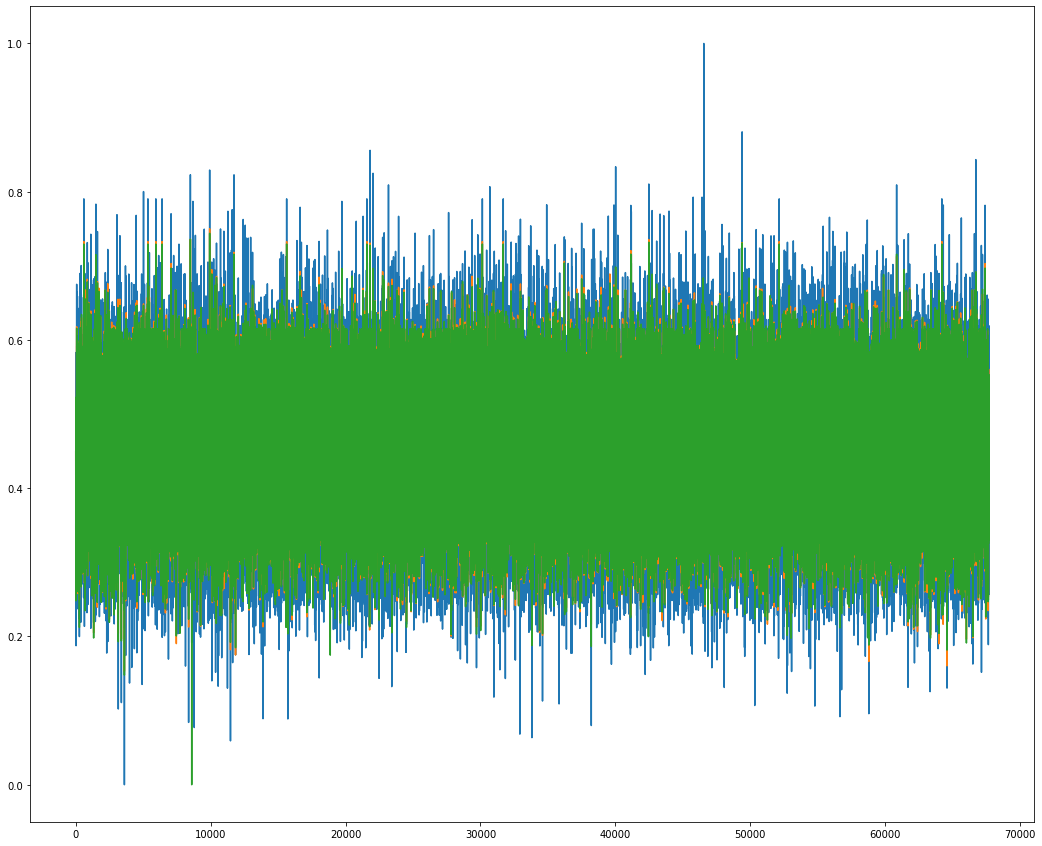

In [68]:
# line plot of observed vs predicted
plt.figure(figsize=(18, 15))
plt.plot(Y_train)
plt.plot(trainPredict)
plt.show()

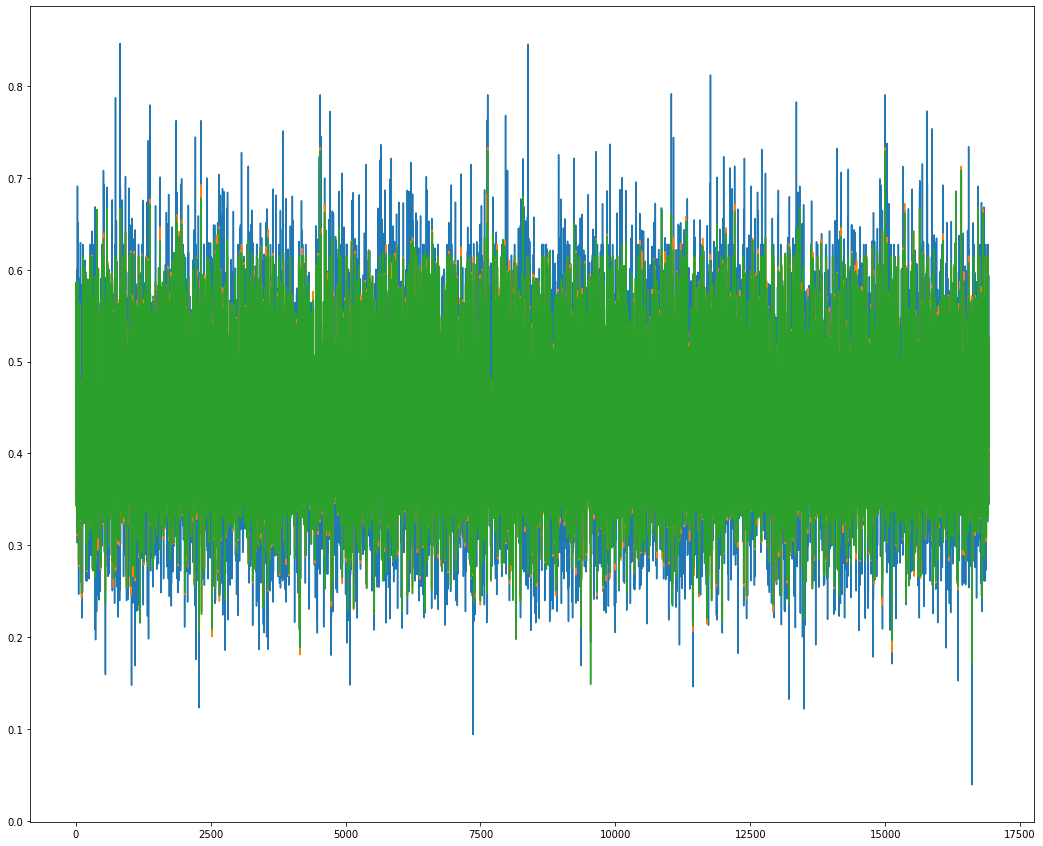

In [67]:
# line plot of observed vs predicted
plt.figure(figsize=(18, 15))
plt.plot(Y_test)
plt.plot(testPredict)
plt.show()

In [53]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
#WordCloud

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [7]:
data.columns

Index(['Tweet', 'sentiment', 'Date', 'depression_Intensity', 'text',
       'text_clean', 'text_clean_tokens', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6',
       'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16',
       'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25'],
      dtype='object')

In [54]:
p=data[data['sentiment']!="Depressed"]
p

,Tweet,sentiment,Date,depression_Intensity,text,text_clean,text_clean_tokens,0,1,2,...,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25
20673,@robinbankzz thanks for followiiiiing legend,Non-Depressive,Sat Jun 06 16:23:05 PDT 2009,0.412875,thanks followiiiiing legend,thanks followiiiiing legend,"['t', 'h', 'a', 'n', 'k', 's', ' ', 'f', 'o', ...",24,30281,3165,...,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
20674,"@emmajg that's my plan. it's only 10 am here,...",Non-Depressive,Sun Jun 07 06:57:27 PDT 2009,0.344886,That plan only here plan whole jammies,plan plan whole jammies,"['p', 'l', 'a', 'n', ' ', 'p', 'l', 'a', 'n', ...",1,533,57,...,0.008000,0.008000,0.008000,0.008000,0.008000,0.208000,0.008000,0.008000,0.208000,0.008000
20675,@yungryfunk have a safe flight!,Non-Depressive,Wed Jun 03 03:05:17 PDT 2009,0.420934,Have safe flight,safe flight,"['s', 'a', 'f', 'e', ' ', 'f', 'l', 'i', 'g', ...",3,644,1099,...,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
20676,hey! @lons sighting at fred 62. i swear i am n...,Non-Depressive,Sat May 02 12:28:19 PDT 2009,0.300517,sighting Fred swear stalker Just,sighting fred swear stalker,"['s', 'i', 'g', 'h', 't', 'i', 'n', 'g', ' ', ...",17207,4455,1758,...,0.008000,0.008000,0.008000,0.008000,0.008000,0.208000,0.008000,0.008000,0.008000,0.008000
20677,@davidarchie aww they're all playing in the uk...,Non-Depressive,Sun May 03 16:29:00 PDT 2009,0.399074,they playing right maybe they come YOUR show,playing right maybe come show,"['p', 'l', 'a', 'y', 'i', 'n', 'g', ' ', 'r', ...",27,251,58,...,0.004000,0.004000,0.104000,0.004000,0.004000,0.004000,0.004000,0.004000,0.119306,0.004000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84598,slow day. @work. lots op people have the day o...,Non-Depressive,Fri May 22 02:19:22 PDT 2009,0.344886,Slow Lots people have nooo Gotta defend fortre...,slow lots people nooo gotta defend fortress,"['s', 'l', 'o', 'w', ' ', 'l', 'o', 't', 's', ...",1001,348,25,...,0.003636,0.003636,0.094545,0.003636,0.003636,0.276364,0.003636,0.094545,0.094545,0.003636
84599,@durian_girl here's a song to celebrate the ar...,Non-Depressive,Sun May 31 03:24:02 PDT 2009,0.444724,Here song celebrate arrival loveliest sweetest...,song celebrate arrival loveliest sweetest baby...,"['s', 'o', 'n', 'g', ' ', 'c', 'e', 'l', 'e', ...",26,144,1077,...,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.130000,0.005000,0.005000
84600,from some strange mystical force i got my suit...,Non-Depressive,Sat May 30 20:49:03 PDT 2009,0.313655,From some strange mystical force suitcase shov...,strange mystical force suitcase shoved zipped,"['s', 't', 'r', 'a', 'n', 'g', 'e', ' ', 'm', ...",10,21,1302,...,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
84601,skyy vodka-raspberry mixed w/ sprite......my d...,Non-Depressive,Sat May 16 20:29:04 PDT 2009,0.344886,skyy vodka raspberry mixed sprite drink choice...,skyy vodka raspberry mixed sprite drink choice...,"['s', 'k', 'y', 'y', ' ', 'v', 'o', 'd', 'k', ...",51825,3007,5536,...,0.006667,0.006667,0.006667,0.173333,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667


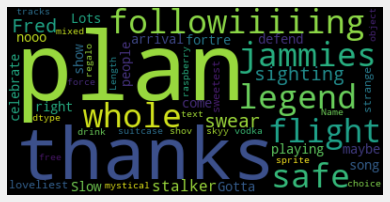

In [55]:
wc = WordCloud()
wc.generate(str(p['text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

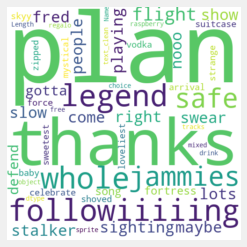

In [56]:
from wordcloud import STOPWORDS

wc = WordCloud(background_color="white", max_words=2000,
                max_font_size=256,stopwords=['festive','this','about'],
               random_state=42, width=500, height=500)
wc.generate(str(p['text_clean']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [57]:
from PIL import Image
import numpy as np

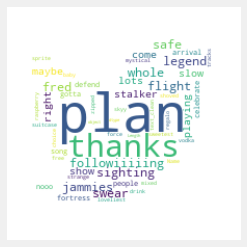

In [58]:
mask = np.array(Image.open('C:/Users/HP/Desktop/tweeter.jpg'))
wc = WordCloud(stopwords=['festive','this','about'], 
               mask=mask, background_color="white",
               max_words=2000, max_font_size=200,
               random_state=42, 
               )
wc.generate(str(p['text_clean']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()